In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold

In [4]:
# Read data
df = pd.read_csv('dataset/train.csv')

# Basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nBasic Info:")
df.info()

Dataset Shape: (159571, 8)

Columns: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Class Distribution:
               Total  Percentage
toxic          15294    9.584448
severe_toxic    1595    0.999555
obscene         8449    5.294822
threat           478    0.299553
insult          7877    4.936361
identity_hate   1405    0.880486


Text(0, 0.5, 'Percentage of Comments')

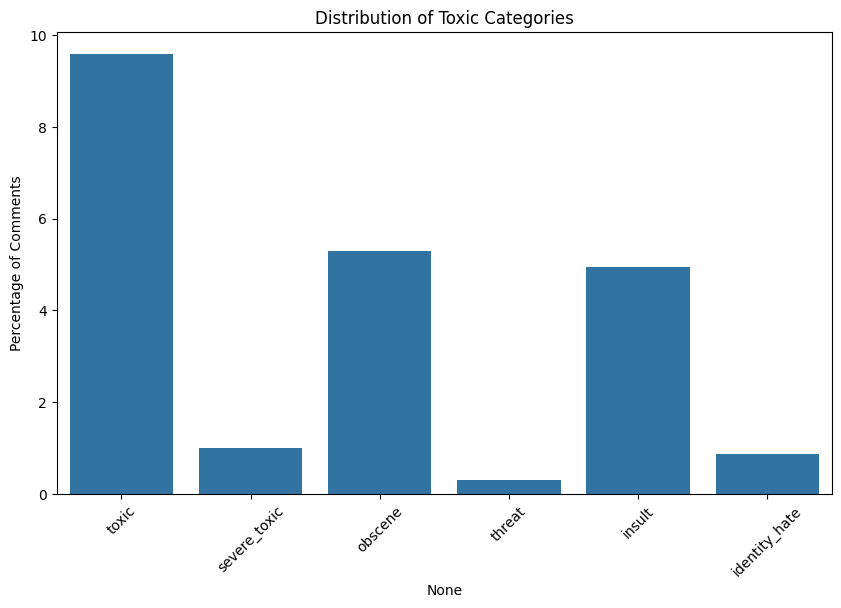

In [5]:
# Calculate percentages for each category
toxic_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
class_distribution = pd.DataFrame({
    'Total': [df[col].sum() for col in toxic_columns],
    'Percentage': [df[col].mean() * 100 for col in toxic_columns]
}, index=toxic_columns)

print("Class Distribution:")
print(class_distribution)

# Visualize distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y='Percentage', data=class_distribution)
plt.xticks(rotation=45)
plt.title('Distribution of Toxic Categories')
plt.ylabel('Percentage of Comments')

Text(0.5, 1.0, 'Average Word Length: Toxic vs Non-Toxic')

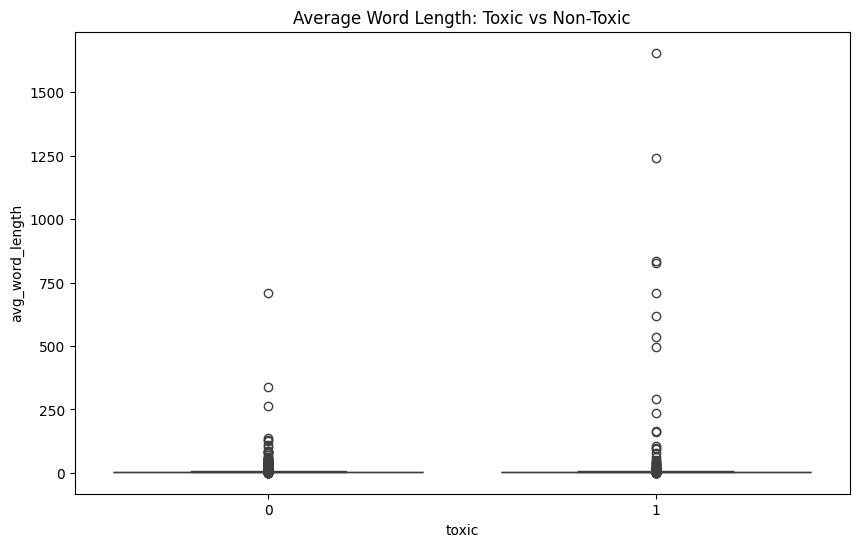

In [19]:
# Average word length
df['avg_word_length'] = df['comment_text'].apply(
    lambda x: np.mean([len(word) for word in str(x).split()]))

plt.figure(figsize=(10, 6))
sns.boxplot(x='toxic', y='avg_word_length', data=df)
plt.title('Average Word Length: Toxic vs Non-Toxic')

Comment Length Statistics:
count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_length, dtype: float64


Text(0.5, 0, 'Comment Length')

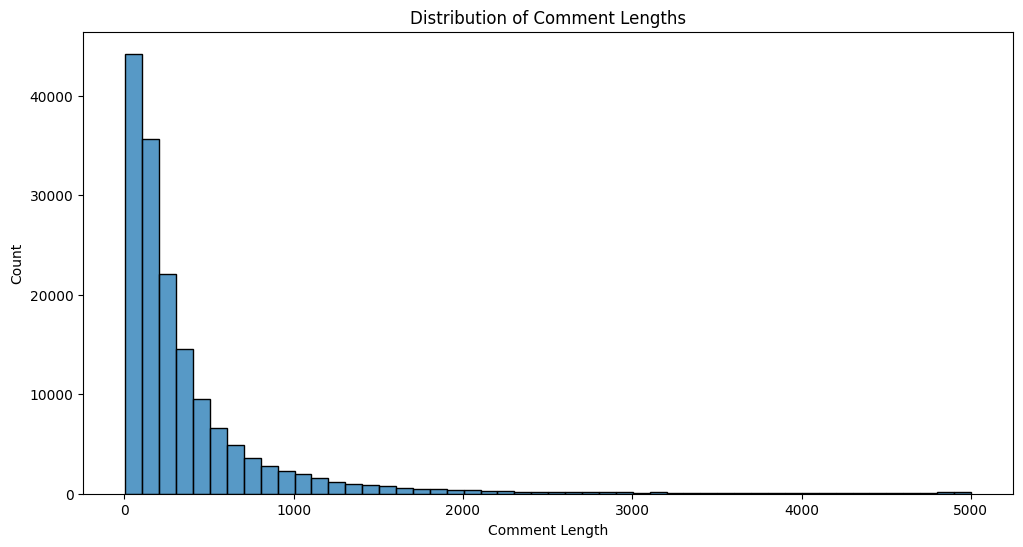

In [6]:
# Add comment length column
df['comment_length'] = df['comment_text'].str.len()

# Basic length statistics
print("Comment Length Statistics:")
print(df['comment_length'].describe())

# Visualize length distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='comment_length', bins=50)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')

Average length of toxic comments: 295.24604420034
Average length of non-toxic comments: 404.5493391185012


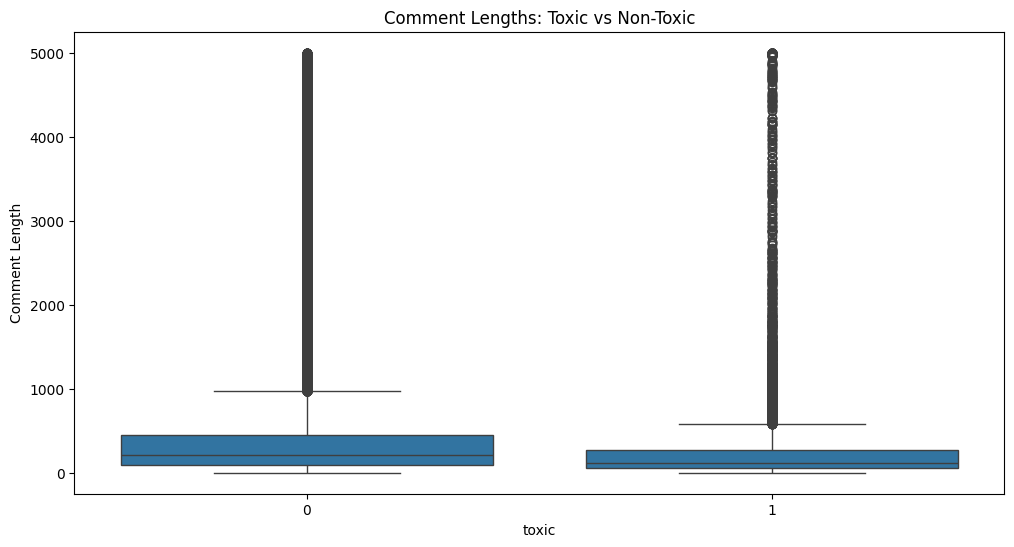

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='toxic', y='comment_length', data=df)
plt.title('Comment Lengths: Toxic vs Non-Toxic')
plt.ylabel('Comment Length')

# Print average lengths
print("Average length of toxic comments:", 
      df[df['toxic'] == 1]['comment_length'].mean())
print("Average length of non-toxic comments:", 
      df[df['toxic'] == 0]['comment_length'].mean())

<>:3: SyntaxWarning: invalid escape sequence '\?'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\?'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/var/folders/fl/rglbmrn16yqcdtnmtkz8cx140000gn/T/ipykernel_22951/4284432954.py:3: SyntaxWarning: invalid escape sequence '\?'
  df['question_count'] = df['comment_text'].str.count('\?')
/var/folders/fl/rglbmrn16yqcdtnmtkz8cx140000gn/T/ipykernel_22951/4284432954.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['period_count'] = df['comment_text'].str.count('\.')


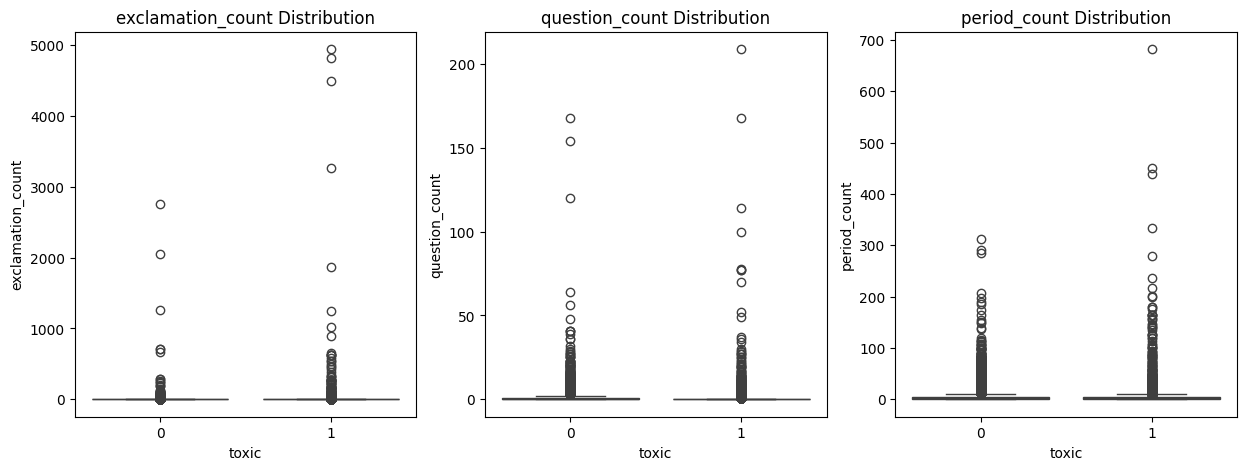

In [20]:
# Count different types of punctuation
df['exclamation_count'] = df['comment_text'].str.count('!')
df['question_count'] = df['comment_text'].str.count('\?')
df['period_count'] = df['comment_text'].str.count('\.')

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axes, ['exclamation_count', 'question_count', 'period_count']):
    sns.boxplot(x='toxic', y=col, data=df, ax=ax)
    ax.set_title(f'{col} Distribution')

Text(0.5, 1.0, 'Correlation between Toxic Categories')

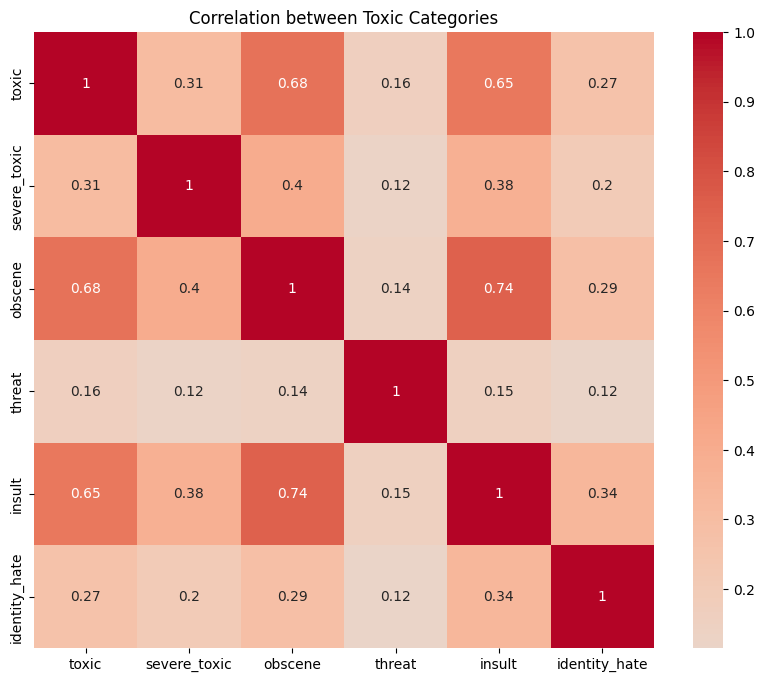

In [8]:
# Create correlation matrix
correlation_matrix = df[toxic_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Toxic Categories')

Text(0.5, 0, 'Number of Toxic Labels')

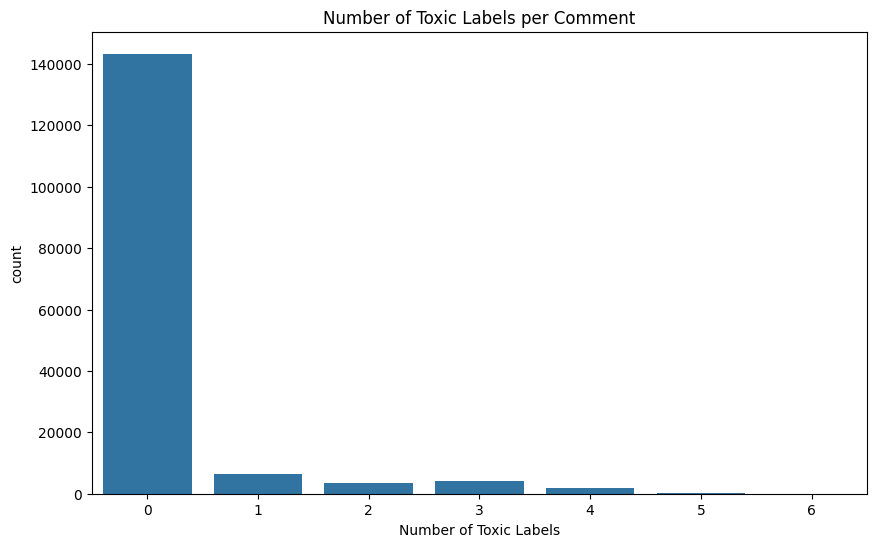

In [9]:
# Count number of toxic labels per comment
df['toxic_count'] = df[toxic_columns].sum(axis=1)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='toxic_count')
plt.title('Number of Toxic Labels per Comment')
plt.xlabel('Number of Toxic Labels')

Text(0.5, 1.0, 'Word Count Distribution: Toxic vs Non-Toxic')

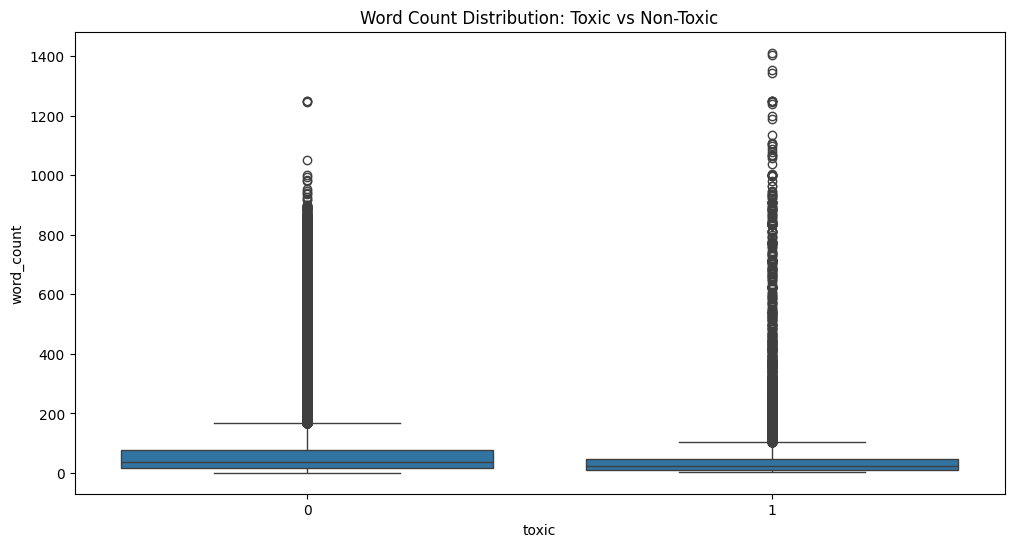

In [10]:
# Add word count column
df['word_count'] = df['comment_text'].str.split().str.len()

# Compare word counts across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='toxic', y='word_count', data=df)
plt.title('Word Count Distribution: Toxic vs Non-Toxic')

Text(0.5, 1.0, 'Uppercase Character Ratio: Toxic vs Non-Toxic')

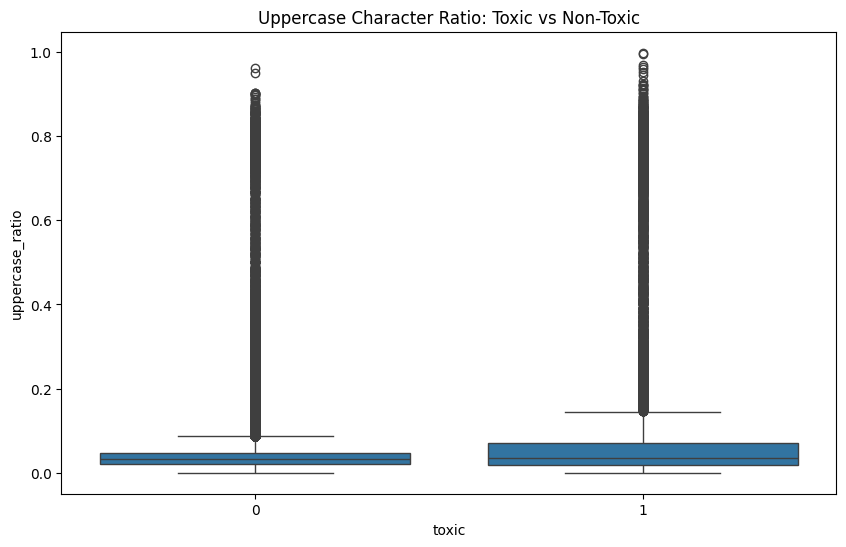

In [11]:
# Add uppercase character count
df['uppercase_count'] = df['comment_text'].str.count(r'[A-Z]')
df['uppercase_ratio'] = df['uppercase_count'] / df['comment_length']

# Compare uppercase usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='toxic', y='uppercase_ratio', data=df)
plt.title('Uppercase Character Ratio: Toxic vs Non-Toxic')

Text(0.5, 1.0, 'Special Character Ratio: Toxic vs Non-Toxic')

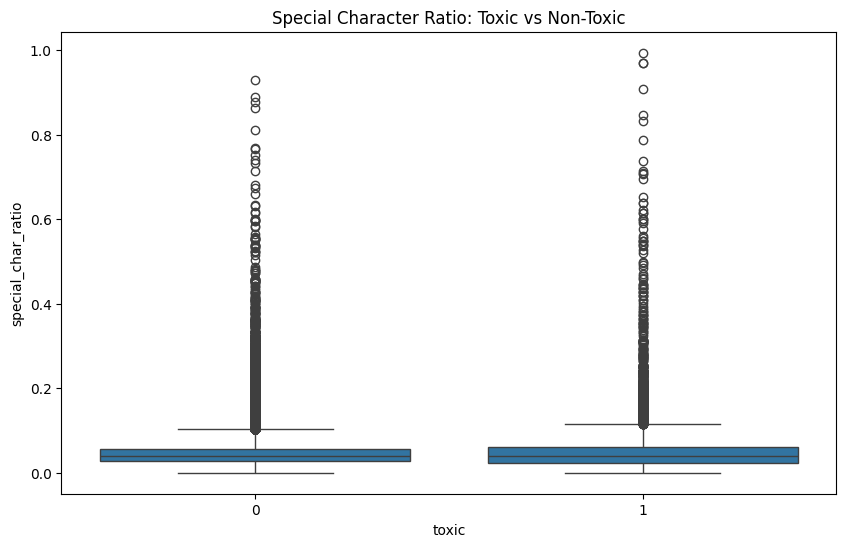

In [12]:
# Count special characters
df['special_char_count'] = df['comment_text'].str.count(r'[^a-zA-Z0-9\s]')
df['special_char_ratio'] = df['special_char_count'] / df['comment_length']

plt.figure(figsize=(10, 6))
sns.boxplot(x='toxic', y='special_char_ratio', data=df)
plt.title('Special Character Ratio: Toxic vs Non-Toxic')

Text(0.5, 1.0, 'Text Complexity: Toxic vs Non-Toxic')

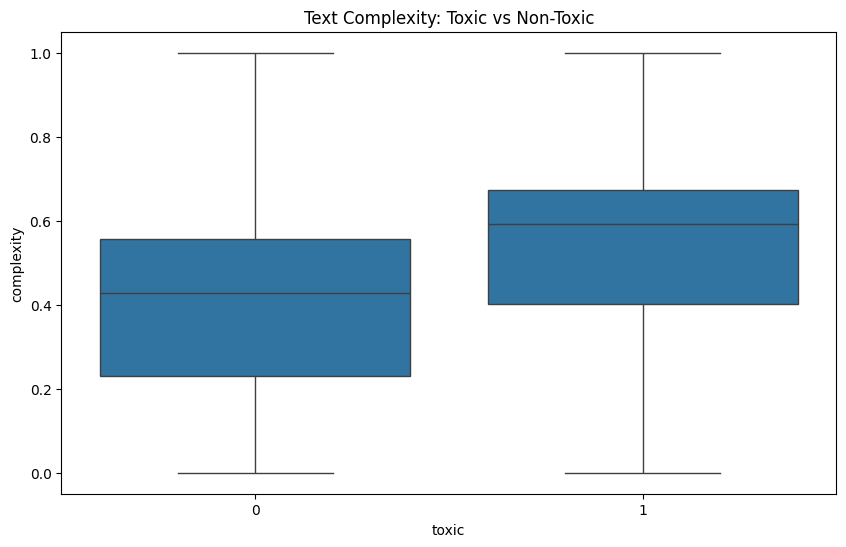

In [13]:
# Sample analysis (use smaller subset for speed)
sample_df = df.sample(1000, random_state=42)
sample_df['complexity'] = sample_df['comment_text'].apply(
    lambda x: TextBlob(x).sentiment.subjectivity)

plt.figure(figsize=(10, 6))
sns.boxplot(x='toxic', y='complexity', data=sample_df)
plt.title('Text Complexity: Toxic vs Non-Toxic')

In [16]:

def get_common_words(text_series, n=20):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\w+', words)
    return Counter(words).most_common(n)

# Most common words in toxic comments
toxic_words = get_common_words(df[df['toxic'] == 1]['comment_text'])
print("Most common words in toxic comments:")
print(pd.DataFrame(toxic_words, columns=['Word', 'Count']))

Most common words in toxic comments:
    Word  Count
0    you  38553
1      i  23309
2    the  20531
3      a  20486
4    and  15772
5     to  15685
6     is  12644
7     of  11425
8   fuck   9934
9   your   9145
10  that   8238
11    it   8197
12   are   8171
13    in   6709
14    my   6184
15     t   5679
16    me   5541
17  this   5497
18    on   4886
19   not   4834


Text(0.5, 1.0, 'Category Co-occurrence Matrix')

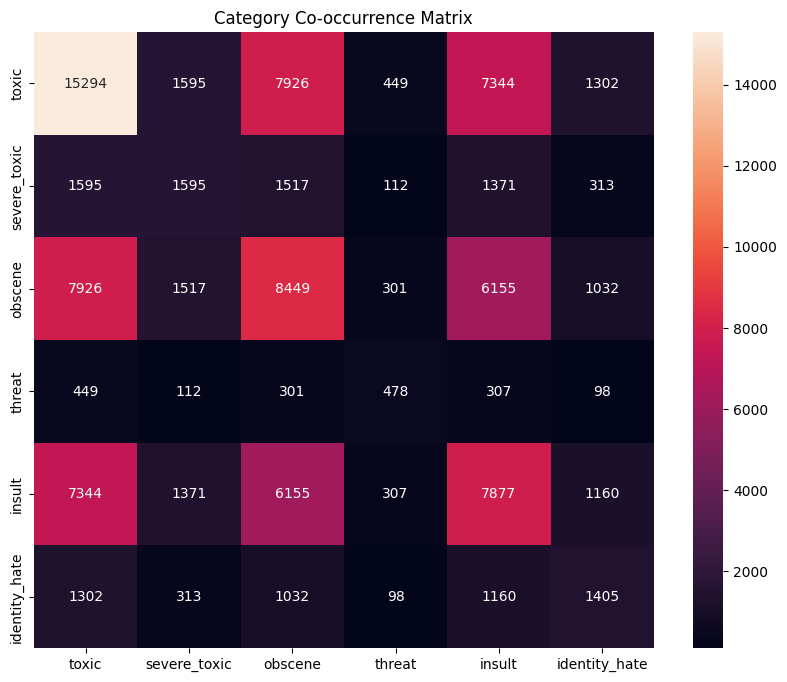

In [17]:
# Create co-occurrence matrix
cooccurrence = df[toxic_columns].T.dot(df[toxic_columns])

plt.figure(figsize=(10, 8))
sns.heatmap(cooccurrence, annot=True, fmt='d')
plt.title('Category Co-occurrence Matrix')

Text(0.5, 1.0, 'Sentiment Distribution: Toxic vs Non-Toxic')

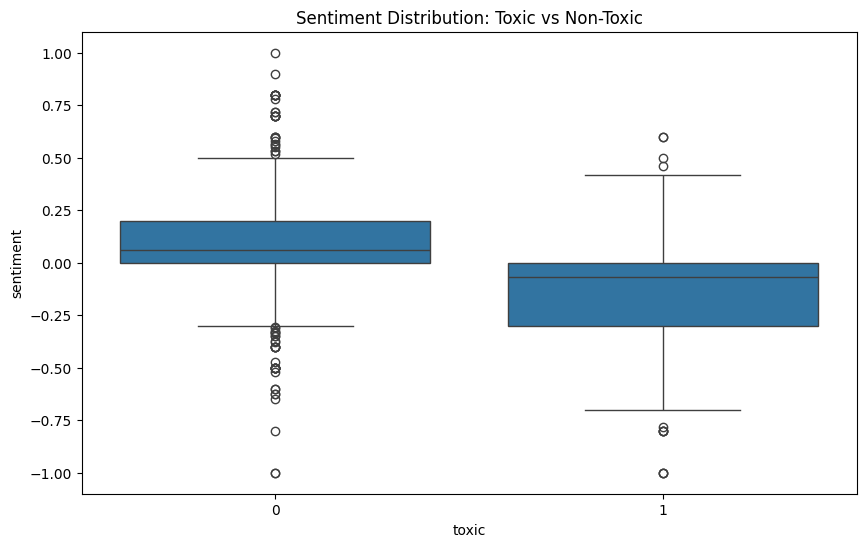

In [18]:
sample_df = df.sample(1000, random_state=42)
sample_df['sentiment'] = sample_df['comment_text'].apply(
    lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.boxplot(x='toxic', y='sentiment', data=sample_df)
plt.title('Sentiment Distribution: Toxic vs Non-Toxic')

In [21]:
# Create summary statistics for each category
summary_stats = pd.DataFrame()
for category in toxic_columns:
    stats = df[df[category] == 1]['comment_length'].describe()
    summary_stats[category] = stats

print("Summary Statistics by Category:")
print(summary_stats)

Summary Statistics by Category:
              toxic  severe_toxic      obscene       threat       insult  \
count  15294.000000   1595.000000  8449.000000   478.000000  7877.000000   
mean     295.246044    453.635110   286.784827   307.740586   277.284753   
std      617.379025   1090.988943   641.088349   730.208700   622.546879   
min        8.000000      8.000000     8.000000    19.000000     8.000000   
25%       59.000000     49.000000    53.000000    67.250000    55.000000   
50%      123.000000     94.000000   110.000000   121.000000   112.000000   
75%      271.000000    216.000000   246.000000   234.500000   243.000000   
max     5000.000000   5000.000000  5000.000000  5000.000000  5000.000000   

       identity_hate  
count    1405.000000  
mean      308.540925  
std       691.629391  
min        18.000000  
25%        57.000000  
50%       114.000000  
75%       258.000000  
max      5000.000000  


In [24]:
# Create vocabulary
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['comment_text'])

# Get vocabulary size
vocab_size = len(vectorizer.vocabulary_)
print(f"Vocabulary size: {vocab_size}")

# Most common words
word_freq = np.array(X.sum(axis=0)).flatten()
word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': word_freq
}).sort_values('frequency', ascending=False)

print("\nTop 20 most frequent words:")
print(word_freq.head(20))

Vocabulary size: 1000

Top 20 most frequent words:
     word  frequency
856   the     496796
882    to     297408
596    of     224547
75    and     224092
997   you     218308
455    is     176405
855  that     160867
460    it     148644
434    in     145477
344   for     102723
871  this      97655
583   not      93774
604    on      89968
124    be      83474
99     as      77444
396  have      72244
91    are      72041
998  your      63396
970  with      59609
428    if      58639


In [26]:
# Create stratified folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Analyze distribution across folds
for i, (train_idx, val_idx) in enumerate(skf.split(df, df['toxic'])):
    train_dist = df.iloc[train_idx][toxic_columns].mean()
    val_dist = df.iloc[val_idx][toxic_columns].mean()
    
    print(f"\nFold {i+1} distributions:")
    print("Training set:", train_dist)
    print("Validation set:", val_dist)


Fold 1 distributions:
Training set: toxic            0.095844
severe_toxic     0.009839
obscene          0.052955
threat           0.003032
insult           0.049179
identity_hate    0.008852
dtype: float64
Validation set: toxic            0.095848
severe_toxic     0.010622
obscene          0.052922
threat           0.002851
insult           0.050102
identity_hate    0.008617
dtype: float64

Fold 2 distributions:
Training set: toxic            0.095851
severe_toxic     0.010066
obscene          0.052876
threat           0.002985
insult           0.049374
identity_hate    0.008907
dtype: float64
Validation set: toxic            0.095820
severe_toxic     0.009714
obscene          0.053237
threat           0.003039
insult           0.049320
identity_hate    0.008398
dtype: float64

Fold 3 distributions:
Training set: toxic            0.095843
severe_toxic     0.009909
obscene          0.052829
threat           0.003016
insult           0.049069
identity_hate    0.008617
dtype: float64
Va